In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [3]:
def plot_data(x, y, ax):
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1)
    neg = neg.reshape(-1)
    
    ax.scatter(x[pos, 0], x[pos, 1], marker="x")
    ax.scatter(x[neg, 0], x[neg, 1], c="red")

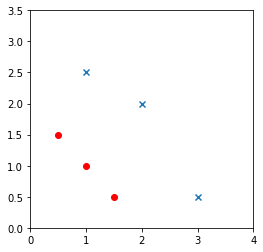

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
plt.show()

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def compute_cost_logistic(x, y, w, b):
    m, n = x.shape
    cost = 0
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        cost += (-y[i]*np.log(f_wb) - (1 - y[i])*np.log(1 - f_wb))
    return cost / m

In [12]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    
    return dj_dw / m, dj_db / m

In [13]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
    
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration: {i}\t Cost: {j_hist[i]}")
    return w, b, j_hist

In [24]:
w_in = np.zeros(X_train.shape[1])
b_in = 0
alpha = 0.1
num_iter = 10000

w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost_logistic, compute_gradient)
print(w, b)

Iteration: 0	 Cost: 0.684610468560574
Iteration: 1000	 Cost: 0.1590977666870457
Iteration: 2000	 Cost: 0.08460064176930078
Iteration: 3000	 Cost: 0.05705327279402531
Iteration: 4000	 Cost: 0.04290759421682
Iteration: 5000	 Cost: 0.03433847729884557
Iteration: 6000	 Cost: 0.02860379802212006
Iteration: 7000	 Cost: 0.02450156960879306
Iteration: 8000	 Cost: 0.02142370332569295
Iteration: 9000	 Cost: 0.019030137124109114
[5.28123029 5.07815608] -14.222409982019837


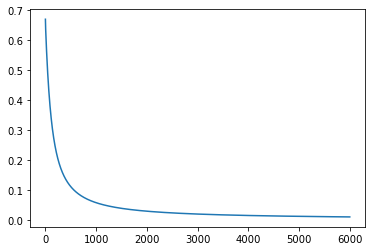

In [22]:
plt.plot(j_hist)
plt.show()

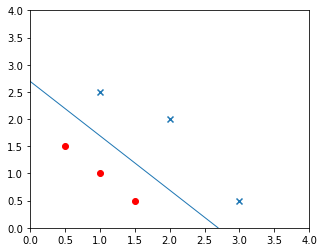

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])

x0 = -b/w[0]
x1 = -b/w[1]
plt.plot([0, x0], [x0, 0], lw=1)
plt.show()